In [1]:
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from textblob import TextBlob
#from geopy.geocoders import Nominatim
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import time
import string
from plotly import graph_objs as go
import plotly.figure_factory as ff
from collections import Counter


from wordcloud import WordCloud
import spacy
#nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [16]:
dff=pd.read_csv("ASOS_reviews _ trustpilot.csv")
dff

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put through a big order in time for...,8-Sep-23
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned an item that because I paid for nex...,9-Sep-23
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,"When first talking to the robot chat helper, I...",8-Sep-23
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos only do returns via QR code to be shown o...,9-Sep-23
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Had a faulty dress and Asos online customer se...,7-Sep-23
...,...,...,...,...,...,...,...
3200,5,Clémence Azema,FR,15-May-23,Great communication and efficient,"Great communication and efficient, glad to hav...",15-May-23
3201,1,Abdallah Hablus,EG,15-May-23,Never buying from asos again,This is the second time this happens. I placed...,3-May-23
3202,5,Sian Fairhurst,GB,15-May-23,Angelica was efficient,"Angelica was efficient, clear and resolved a c...",15-May-23
3203,5,Claire,GB,15-May-23,Amazing customer service always,Amazing customer service always\nI spoke to Iv...,15-May-23


In [17]:
dff.shape

(3205, 7)

In [18]:
dff.duplicated().sum()

0

In [19]:
dff.isnull()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3200,False,False,False,False,False,False,False
3201,False,False,False,False,False,False,False
3202,False,False,False,False,False,False,False
3203,False,False,False,False,False,False,False


In [20]:
dfff = dff.groupby("Location")

In [21]:
dfff.first()

,Star_rating,Username,Date,Review_topic,Reviews,Date_experience
Location,,,,,,
AE,5,kate irish,2023-08-28T20:21:32.000Z,Amazing customer service,Bryan was very helpful and easy to deal with.,28-Aug-23
AM,5,Elen,2023-08-25T17:41:44.000Z,A very kind Adrian who gave the fastest…,A very kind Adrian who gave the fastest soluti...,25-Aug-23
AT,5,"Daniela Kasperer, BEd",2023-07-06T15:11:59.000Z,Very nice person and super friendly,Very nice and super friendly personell.\nAsos ...,5-Jul-23
AU,2,Ari Olive,2023-09-08T02:17:33.000Z,Painfully long return,Painfully long return. AVOID if you are from A...,8-Sep-23
AZ,5,Nasiba Agayeva,2023-07-26T09:01:39.000Z,Marc is very well informed and patient,thanks for all,26-Jul-23
...,...,...,...,...,...,...
UA,1,Igor “Lait”,2023-07-20T19:12:05.000Z,I order for the 4th time,"I order for the 4th time, they constantly send...",29-Jun-23
US,2,Pam,2023-09-05T20:35:24.000Z,SNEAKY,"When I use their own promo code for 20% off, s...",5-Sep-23
UY,5,Gool Uy,2023-07-24T22:10:44.000Z,They solve my problem.,None,24-Jul-23


In [22]:
df=dfff.get_group('GB')
df

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put through a big order in time for...,8-Sep-23
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned an item that because I paid for nex...,9-Sep-23
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,"When first talking to the robot chat helper, I...",8-Sep-23
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos only do returns via QR code to be shown o...,9-Sep-23
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Had a faulty dress and Asos online customer se...,7-Sep-23
...,...,...,...,...,...,...,...
3198,2,Tia Jordan,GB,15-May-23,Really disappointed,Really disappointed they do not offer exchange...,15-May-23
3199,5,marie shim,GB,15-May-23,Great customer service,Great customer service. No long wait Time on c...,15-May-23
3202,5,Sian Fairhurst,GB,15-May-23,Angelica was efficient,"Angelica was efficient, clear and resolved a c...",15-May-23
3203,5,Claire,GB,15-May-23,Amazing customer service always,Amazing customer service always\nI spoke to Iv...,15-May-23


In [23]:
df[['Reviews']].head(50)

,Reviews
0,I recently put through a big order in time for...
1,I returned an item that because I paid for nex...
2,"When first talking to the robot chat helper, I..."
3,Asos only do returns via QR code to be shown o...
4,Had a faulty dress and Asos online customer se...
5,I have been shopping consistently with ASOS fo...
7,Cancelled my account after being a customer fo...
8,What has happened to ASOS??? Refusing to refun...
9,I purchased Fashionkilla glam high waisted sha...
10,Love shopping here and great customer service ...


In [24]:
# remove special characters from text column
df.Reviews= df.Reviews.str.replace('[#,@,&]', '')
#Remove twitter handlers
df.Reviews= df.Reviews.str.replace('@[^\s]+','')
#Remove digits
df.Reviews= df.Reviews.str.replace(' \d+ ','')
# remove multiple spaces with single space
df.Reviews=df.Reviews.str.replace("http\S+", "")
# remove multiple spaces with single space
df.Reviews= df.Reviews.str.replace('\s+', ' ')
#remove all single characters
df.Reviews = df.Reviews.str.replace(r'\s+[a-zA-Z]\s+', '')
df[['Reviews']].head(50)

,Reviews
0,I recently put throughbig order in time for my...
1,I returned an item that becausepaid for next d...
2,When first talking to the robot chat helperdid...
3,Asos only do returns via QR code to be shown o...
4,Hadfaulty dress and Asos online customer servi...
5,I have been shopping consistently with ASOS fo...
7,Cancelled my account after beingcustomer for o...
8,What has happened to ASOS??? Refusing to refun...
9,I purchased Fashionkilla glam high waisted sha...
10,Love shopping here and great customer service ...


In [25]:
df['Reviews'] = df['Reviews'].astype(str)


In [26]:
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))

**TOKENIZING AND REMOVING STOP WORDS THE REVIEEWS**

In [27]:
def preprocess_reviews(review):
    # Tokenize the input text
    tokens = word_tokenize(review)

    # Define the list of stop words
    stop_words = set(stopwords.words('english'))

    # Define the Lemmatizer
    Lemmatizer = WordNetLemmatizer()

    # Remove stop words from the token sequence
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the remaining tokens
    tokens = [Lemmatizer.lemmatize(token) for token in tokens]

    # Join the cleaned tokens into a single string
    return ' '.join(tokens)

In [28]:
df['Reviews'] = df['Reviews'].apply(preprocess_reviews)

In [29]:
df['Reviews'].head(50) 

0     I recently put throughbig order time holiday d...
1     I returned item becausepaid next day delivery ...
2     When first talking robot chat helperdid n't ge...
3     Asos return via QR code shown onsmart phone . ...
4     Hadfaulty dress Asos online customer service a...
5     I shopping consistently ASOS foryears confiden...
7     Cancelled account beingcustomer overdecade spe...
8     What happened ASOS ? ? ? Refusing refund evide...
9     I purchased Fashionkilla glam high waisted sha...
10    Love shopping great customer service issue . P...
11    A user friendly app also find good deal onregu...
12    I placed order asos withfew item one large . A...
13    Great customer interaction.product orderedmont...
14    Hadlovely friendly chat telling Jericho two it...
15    Literally impossible gethold anymore . It used...
16    Nicole Precious incredibly helpful informative...
17    Maria customer care gave straight forward care...
18    Bring back DPD Would happily pay premier m

**CALCULATING DATA FREQUENCY**


In [30]:
from collections import Counter

In [31]:
# Preprocessing: Convert text to lowercase, tokenize, and remove stopwords
stop_words = set(stopwords.words('english'))

In [32]:
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

In [33]:
# Calculate word frequency
word_counter = Counter()

for text in df['Reviews']:
    cleaned_words = preprocess_text(text)
    word_counter.update(cleaned_words)

In [34]:
# Display the most common words and their frequencies
most_common_words = word_counter.most_common()
for word, freq in most_common_words:
    print(f'{word}: {freq}')

customer: 1237
asos: 1170
service: 1081
item: 696
helpful: 634
order: 621
issue: 595
chat: 502
delivery: 480
return: 477
day: 472
refund: 426
nan: 400
time: 399
back: 341
next: 288
get: 281
great: 278
parcel: 269
really: 263
quick: 258
told: 252
would: 236
help: 232
email: 226
quickly: 220
problem: 220
evri: 219
sorted: 219
one: 209
sent: 206
even: 206
care: 202
money: 202
thank: 201
never: 197
company: 196
still: 191
resolved: 188
account: 186
received: 184
team: 180
online: 179
good: 171
experience: 169
friendly: 161
contact: 154
code: 153
like: 143
delivered: 140
returned: 138
query: 137
said: 137
got: 131
use: 131
could: 130
agent: 126
always: 126
efficient: 124
way: 120
used: 119
today: 119
easy: 116
response: 114
much: 113
discount: 113
also: 112
away: 112
ordered: 111
wait: 111
live: 110
go: 109
helped: 107
missing: 106
due: 106
resolve: 106
polite: 106
wrong: 103
two: 102
nothing: 102
able: 102
year: 101
trainer: 101
extremely: 101
super: 101
thanks: 100
made: 100
refunded: 98


**VISUALIZING MOST COMMON WORDS USING BARCHART**

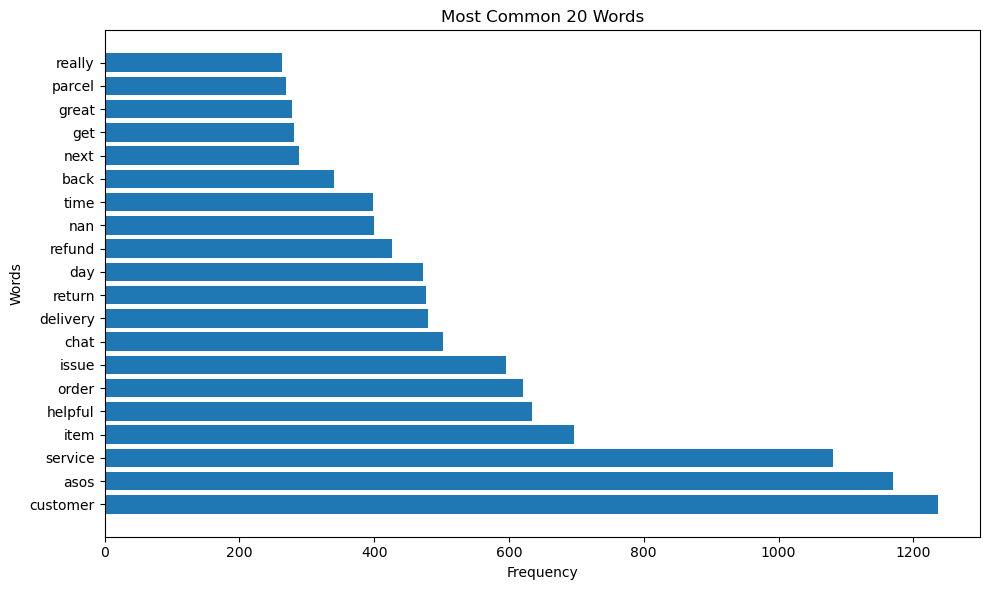

In [35]:
# Assuming you have calculated word_counter as a Counter object

# Get the most common words and their frequencies
most_common_words = word_counter.most_common(20)

# Extract words and frequencies for plotting
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]


# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common 20 Words')
#plt.xticks(ha='right')
plt.tight_layout()

plt.show()

In [36]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TOLS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

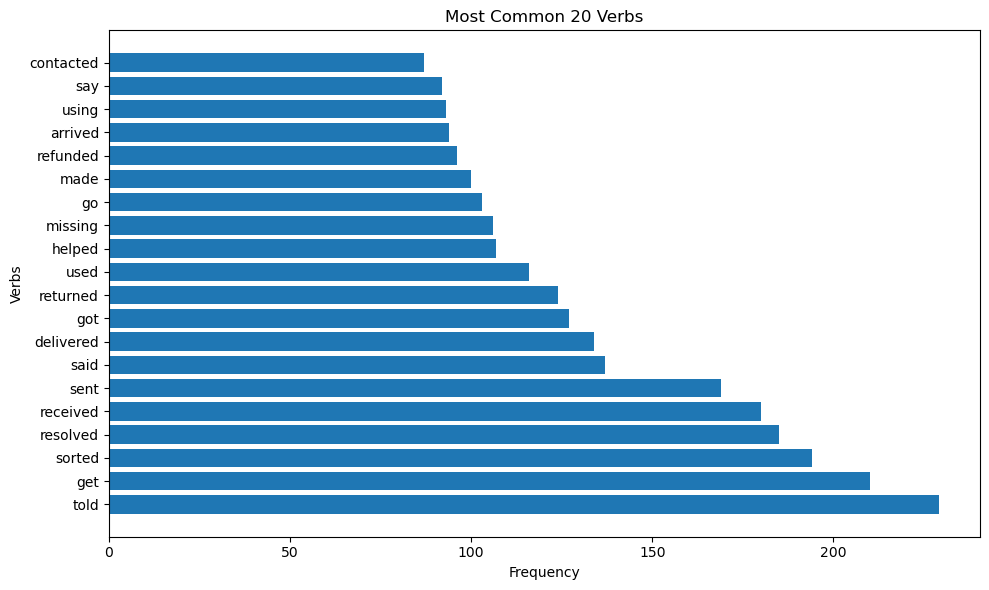

In [37]:
stop_words = set(stopwords.words('english'))

# Create a Counter to store verb frequencies
verb_counter = Counter()

# Iterate through each text in the DataFrame
for text in df['Reviews']:
    cleaned_words = preprocess_text(text)
    pos_tags = nltk.pos_tag(cleaned_words)  # Part-of-speech tagging
    
    # Count verbs
    for word, pos in pos_tags:
        if pos.startswith('VB'):  # VB stands for verbs
            verb_counter[word] += 1
            
 # Get the most common verbs and their frequencies
most_common_verbs = verb_counter.most_common(20)

# Extract verbs and frequencies for plotting
verbs = [verb for verb, freq in most_common_verbs]
frequencies = [freq for verb, freq in most_common_verbs]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(verbs, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Verbs')
plt.title('Most Common 20 Verbs')
plt.tight_layout()

plt.show()           
            

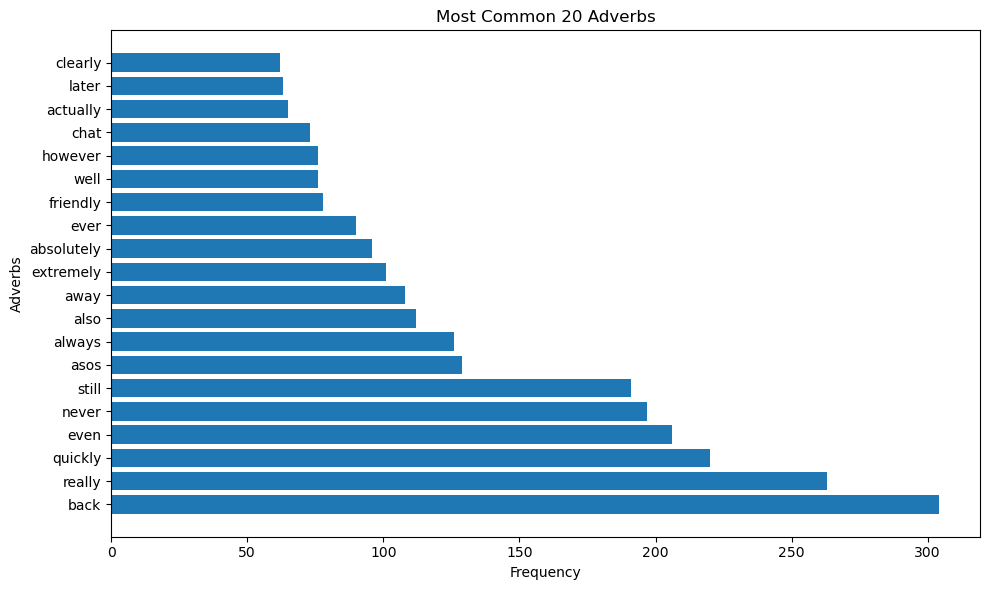

In [38]:
# Create a Counter to store adverb frequencies
adverb_counter = Counter()

# Iterate through each text in the DataFrame
for text in df['Reviews']:
    cleaned_words = preprocess_text(text)
    pos_tags = nltk.pos_tag(cleaned_words)  # Part-of-speech tagging
    
    # Count adverbs
    for word, pos in pos_tags:
        if pos == 'RB':  # RB stands for adverbs
            adverb_counter[word] += 1

# Get the most common adverbs and their frequencies
most_common_adverbs = adverb_counter.most_common(20)

# Extract adverbs and frequencies for plotting
adverbs = [adverb for adverb, freq in most_common_adverbs]
frequencies = [freq for adverb, freq in most_common_adverbs]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(adverbs, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Adverbs')
plt.title('Most Common 20 Adverbs')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()       
            

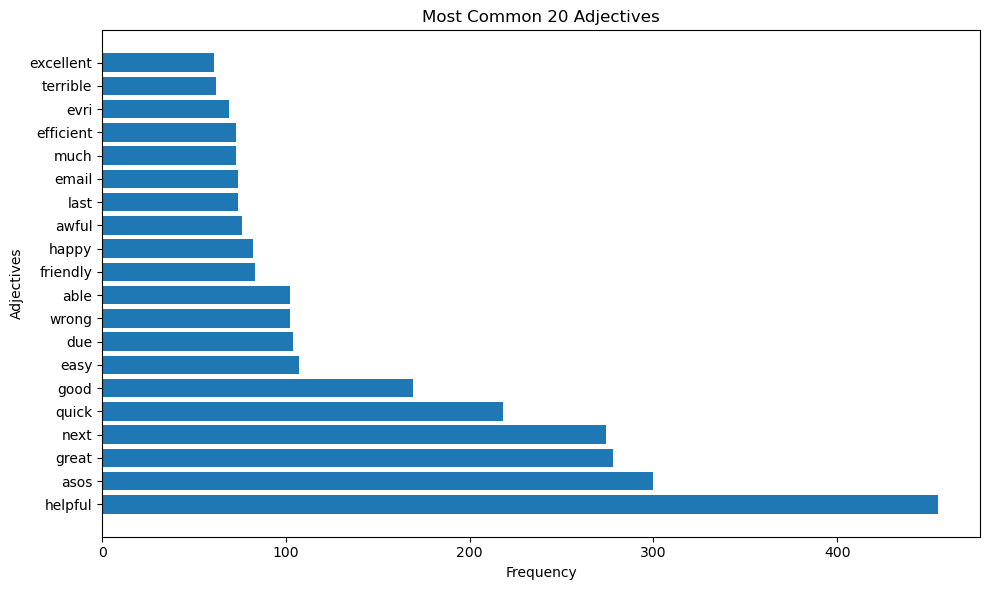

In [39]:
# Create a Counter to store adjective frequencies
adjective_counter = Counter()

# Iterate through each text in the DataFrame
for text in df['Reviews']:
    cleaned_words = preprocess_text(text)
    pos_tags = nltk.pos_tag(cleaned_words)  # Part-of-speech tagging
    
    # Count adjectives
    for word, pos in pos_tags:
        if pos == 'JJ':  # JJ stands for adjectives
            adjective_counter[word] += 1

# Get the most common adjectives and their frequencies
most_common_adjectives = adjective_counter.most_common(20)

# Extract adjectives and frequencies for plotting
adjectives = [adj for adj, freq in most_common_adjectives]
frequencies = [freq for adj, freq in most_common_adjectives]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(adjectives, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.title('Most Common 20 Adjectives')
plt.tight_layout()

plt.show()

In [40]:
df.head(20)

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23
5,5,Jennifer Procter,GB,2023-09-07T12:33:19.000Z,8 years of good shopping experiences.,I shopping consistently ASOS foryears confiden...,7-Sep-23
7,1,Emily,GB,2023-09-09T23:54:58.000Z,Cancelled my account after being a…,Cancelled account beingcustomer overdecade spe...,1-Sep-23
8,1,customer,GB,2023-09-08T22:46:59.000Z,What has happened to ASOS??,What happened ASOS ? ? ? Refusing refund evide...,7-Sep-23
9,3,Grace Vuzantoko,GB,2023-09-05T17:14:06.000Z,Good purchase,I purchased Fashionkilla glam high waisted sha...,23-Aug-23
10,5,Victoria Hanna,GB,2023-09-07T23:38:25.000Z,Love shopping here and great customer…,Love shopping great customer service issue . P...,7-Sep-23


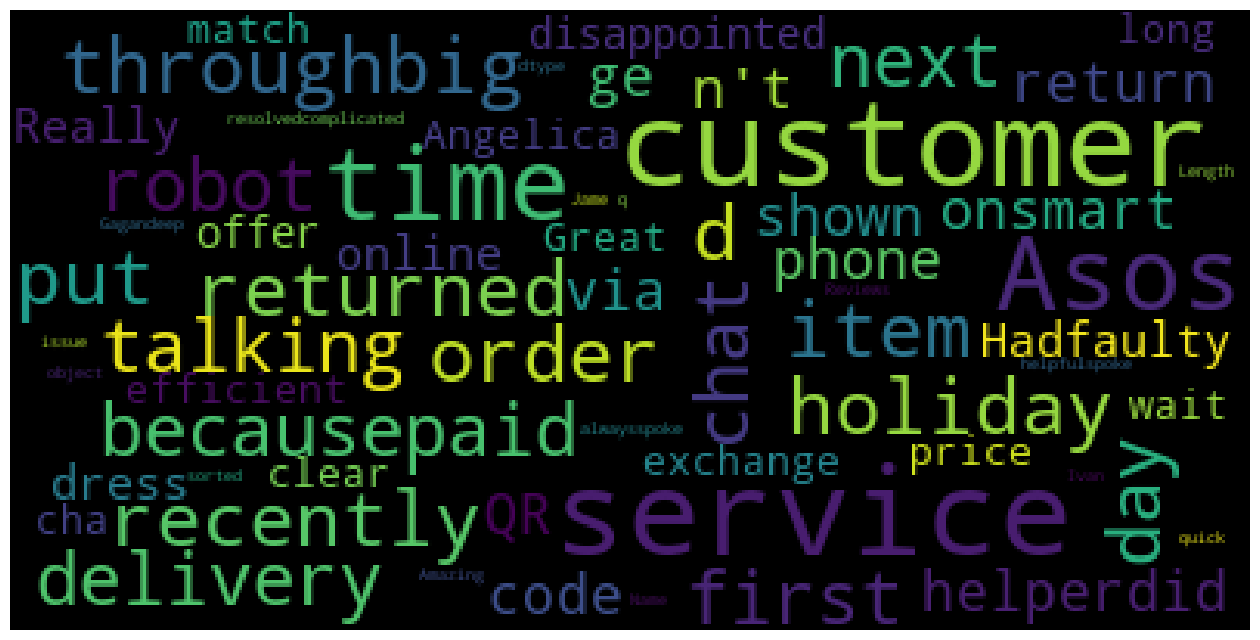

In [41]:
wordcloud_ = WordCloud(
                          background_color='black',
                          max_words=500,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['Reviews'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(16,12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

## POLARITY ANALYSIS

In [42]:
#defining the function getTextPolarity.
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [43]:
df['polarity'] =df['Reviews'].apply(getTextPolarity)
df.head()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250


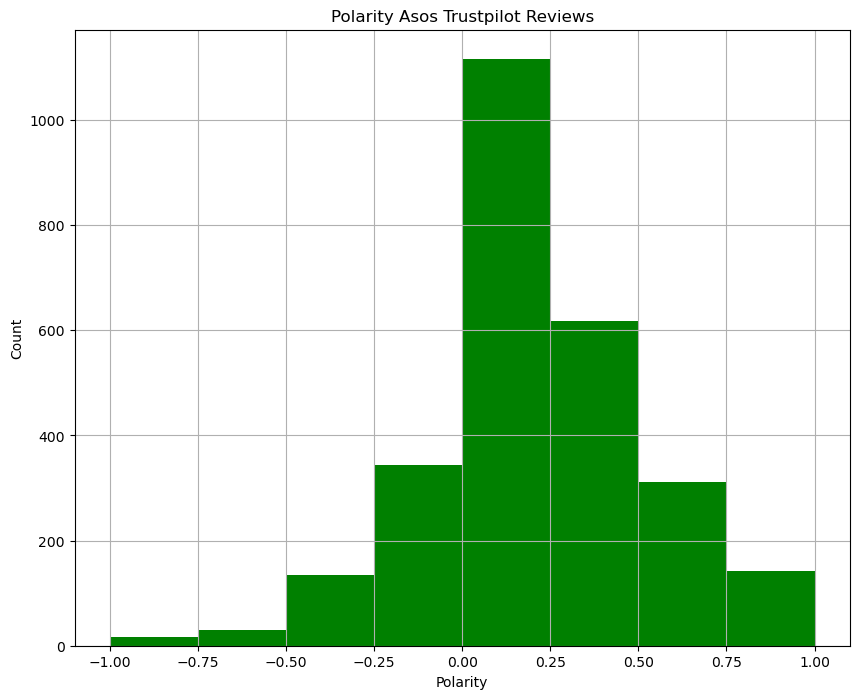

In [44]:
#General Polarity
fig, ax = plt.subplots(figsize=(10, 8))

df['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="green")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Asos Trustpilot Reviews')
plt.show()

In [85]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
df.head()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity,Happy,Angry,Surprise,Sad,Fear,Emotion
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250,0.17,0.0,0.00,0.50,0.33,Sad
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667,1.00,0.0,0.00,0.00,0.00,Happy
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667,0.17,0.0,0.00,0.33,0.50,Fear
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333,0.00,0.0,0.17,0.33,0.50,Fear
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000,0.67,0.0,0.00,0.00,0.33,Happy


**POLARITY COUNT**

Text(0.5, 1.0, 'Polarity Count')

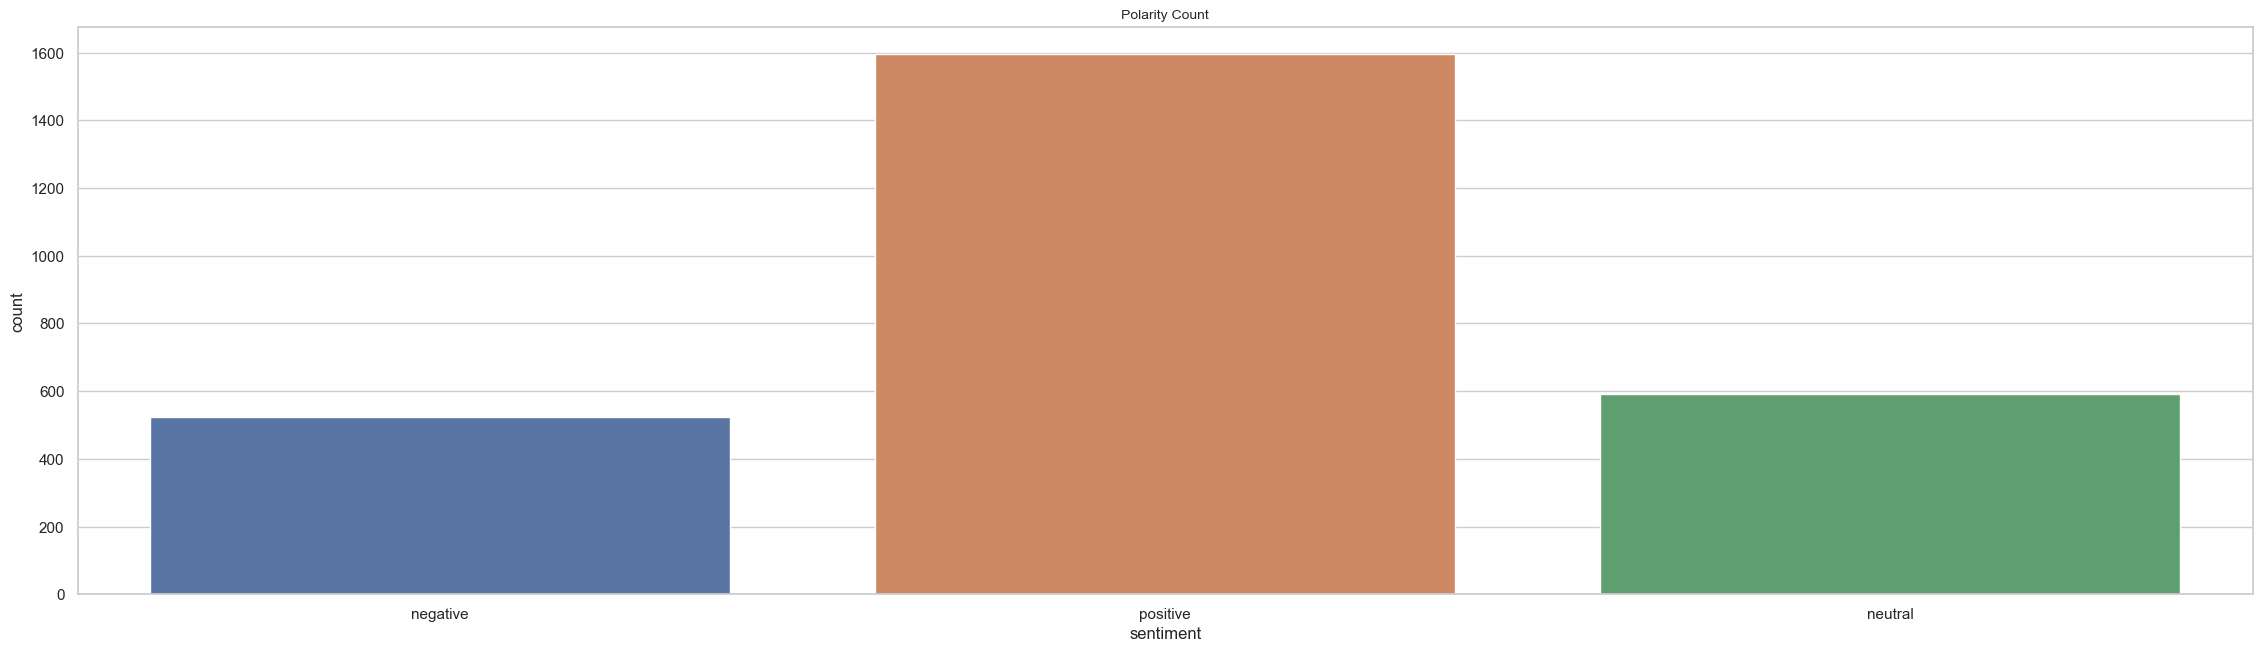

In [86]:
#Using seaborn count plot to view the polarity.
sns.countplot(x='sentiment', data=df)
plt.title('Polarity Count', fontsize=10)

Positive words


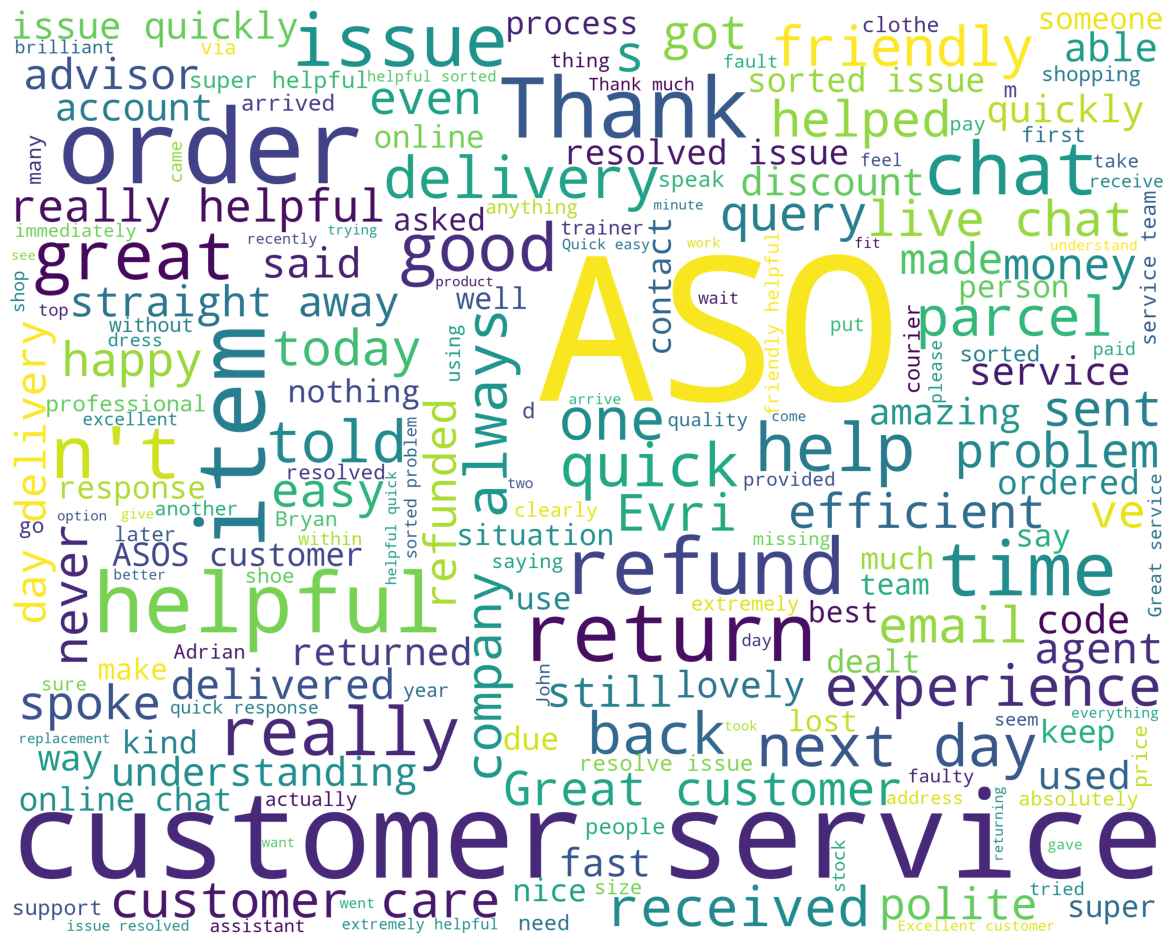

Negative words


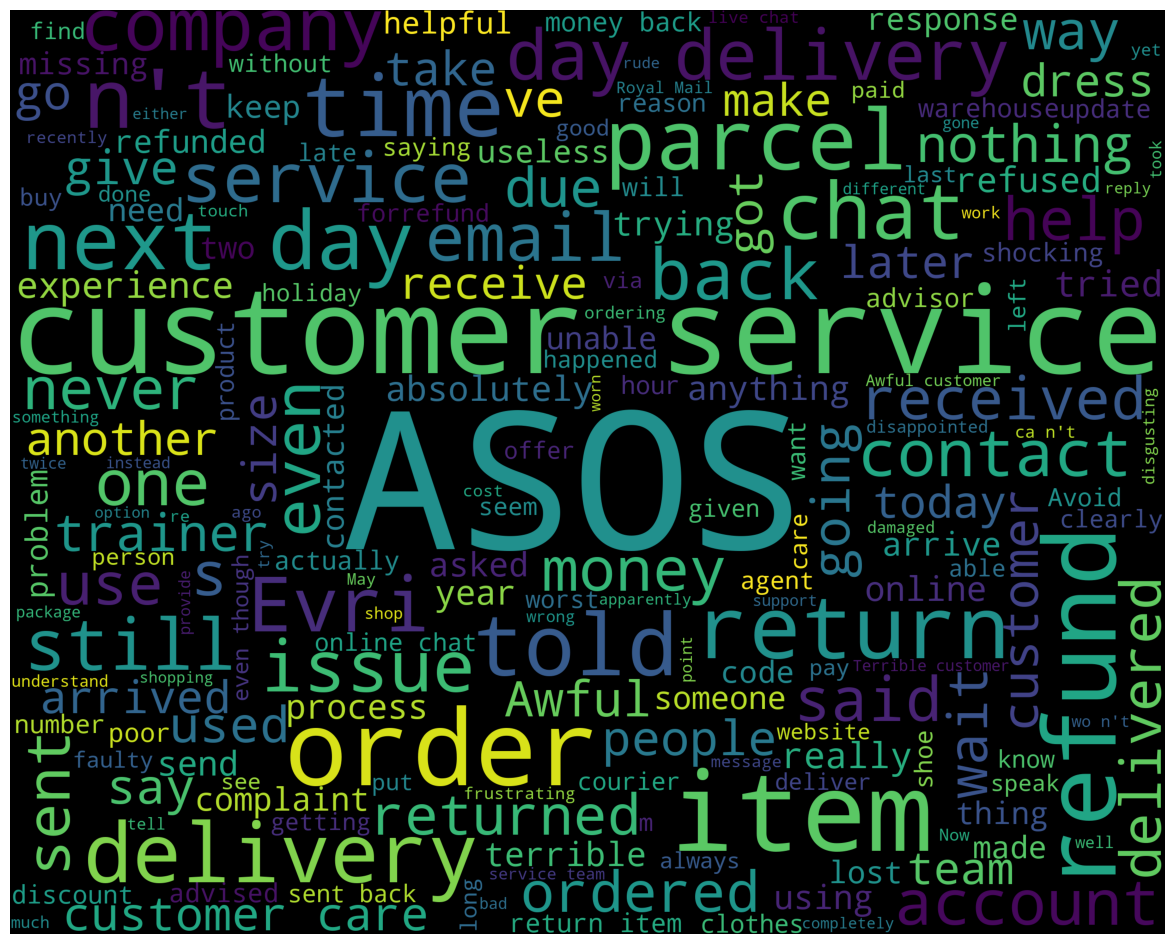

Neutral words


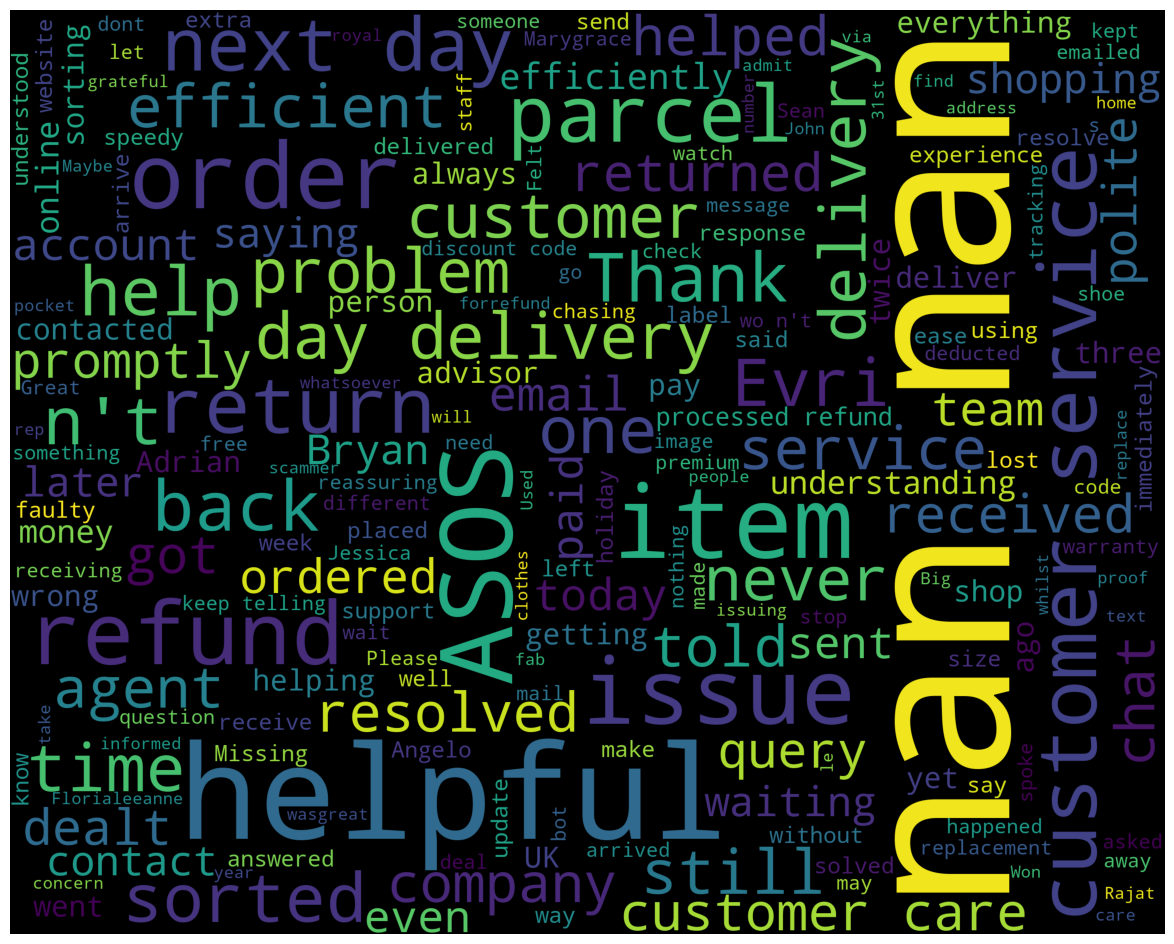

In [47]:
df_pos = df[ df['sentiment'] == 'positive']
df_pos = df_pos['Reviews']
df_neg = df[ df['sentiment'] == 'negative']
df_neg = df_neg['Reviews']
df_neu = df[ df['sentiment'] == 'neutral']
df_neu = df_neu['Reviews']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(16, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(df_pos,'white')
print("Negative words")
wordcloud_draw(df_neg)
print("Neutral words")
wordcloud_draw(df_neu)

## SUBJECTIVITY OF ANALYSIS OF THE REVIEWS

In [48]:
##defining the function getTextSubjectivity.
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [49]:
#Applying the defined function and creating the subjectivity column
df['subjectivity'] =df['Reviews'].apply(getTextSubjectivity)
df.head()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000


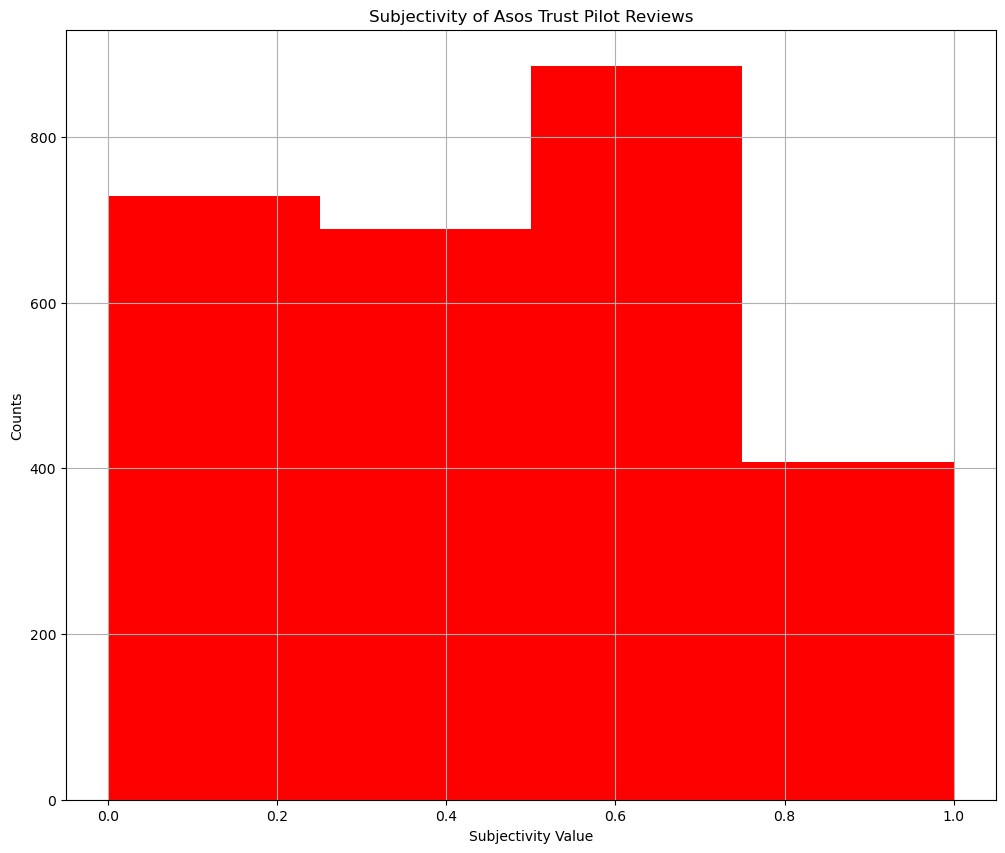

In [50]:
#General Subjectivity
fig, ax = plt.subplots(figsize=(12, 10))

df['subjectivity'].hist(bins=[0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="red")
plt.title("Subjectivity of Asos Trust Pilot Reviews")
plt.xlabel('Subjectivity Value')
plt.ylabel('Counts')
plt.show()

## TOPIC MODELLING ANALYSIS

In [51]:
df_neu = df[ df['sentiment'] == 'neutral']
df_neu = df_neu[['Reviews']]
df_neu

,Reviews
72,Order placed 30th . Spoke three different peop...
74,Contacted customer service twice unfulfilled r...
97,Asos need stop using evri ashave parcel saying...
114,I paid one year premium ( next day delivery ) ...
123,Issue resolved sent proof speedy response
...,...
3175,nan
3177,nan
3180,nan
3186,nan


In [52]:
df_neu.shape


(592, 1)

In [53]:
df_neu.describe

<bound method NDFrame.describe of                                                 Reviews
72    Order placed 30th . Spoke three different peop...
74    Contacted customer service twice unfulfilled r...
97    Asos need stop using evri ashave parcel saying...
114   I paid one year premium ( next day delivery ) ...
123           Issue resolved sent proof speedy response
...                                                 ...
3175                                                nan
3177                                                nan
3180                                                nan
3186                                                nan
3192                                                nan

[592 rows x 1 columns]>

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
# Preprocessing: tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)
df_neu['processed_text'] = df_neu['Reviews'].apply(preprocess_text)

In [56]:
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
dtm = vectorizer.fit_transform(df_neu['processed_text'])

In [57]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [58]:
# Print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: nan, asos, email, still, could, back, item, saying, evri, parcel
Topic #2: helpful, customer, issue, service, delivery, day, thank, next, refund, efficient
Topic #3: day, delivery, next, helpful, issue, sorted, item, service, parcel, return
Topic #4: order, customer, time, asos, service, refund, evri, care, help, get
Topic #5: customer, item, refund, helpful, asos, service, return, back, order, helped


## TOPIC MODELLING FOR NEGATIVE REVIEWS

In [59]:
df_neg = df[ df['sentiment'] == 'negative']
df_neg = df_neg[['Reviews']]
df_neg

,Reviews
0,I recently put throughbig order time holiday d...
3,Asos return via QR code shown onsmart phone . ...
4,Hadfaulty dress Asos online customer service a...
12,I placed order asos withfew item one large . A...
23,Boughtsuite jacket trouser waste coatfew month...
...,...
3179,My advisor helpful ’ answering question seemed...
3183,Awful service.bought expensive Whistles leathe...
3184,A computer error made voucher order process tw...
3191,Mervin helpful assisted promptly query also lo...


In [60]:
df_neg.shape

(523, 1)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [62]:
# Preprocessing: tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)
df_neg['processed_text'] = df_neg['Reviews'].apply(preprocess_text)

In [63]:
# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
dtm = vectorizer.fit_transform(df_neg['processed_text'])

In [64]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [65]:
# Print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: delivery, day, asos, next, parcel, service, customer, evri, order, time
Topic #2: item, asos, customer, refund, size, service, sent, wrong, trainer, return
Topic #3: asos, customer, service, return, chat, back, item, refund, one, would
Topic #4: customer, item, service, asos, order, return, email, issue, chat, account
Topic #5: back, asos, return, item, service, time, chat, customer, told, sent


## STAR RATING VISUALIZATION

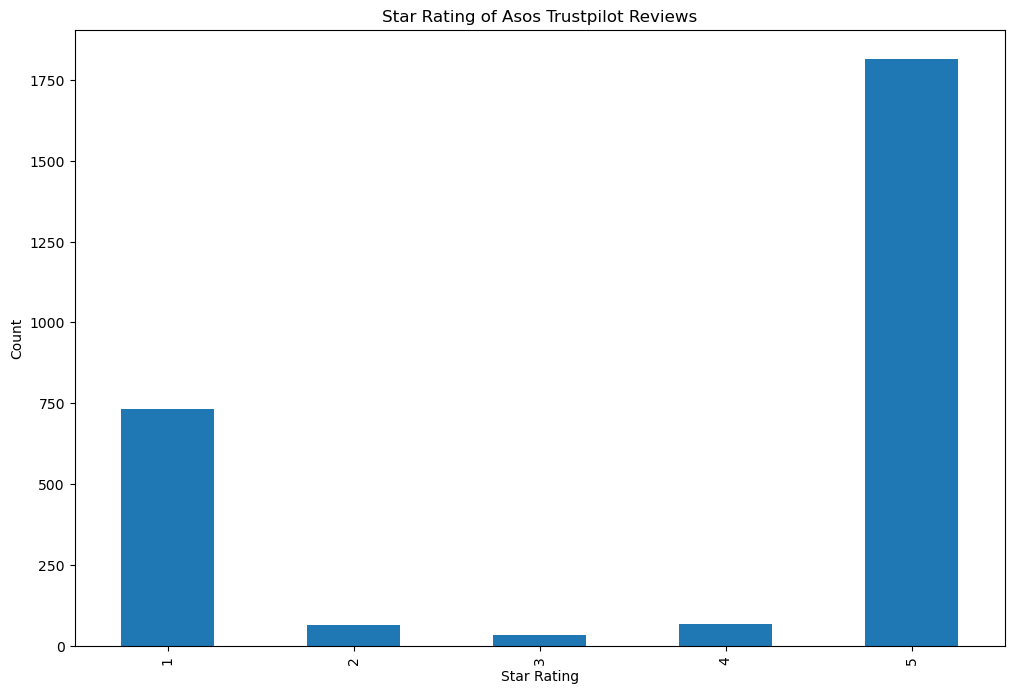

In [66]:
#ASOS TRUSTPILOT STAR RATING 
df['Star_rating'].value_counts().sort_index().plot(kind='bar', title ='Star Rating of Asos Trustpilot Reviews', figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel('Count')


plt.show()

# EMOTION ANALYSIS

In [67]:
#importing necessary libraries

!pip install text2emotion

Defaulting to user installation because normal site-packages is not writeable


In [68]:
#text to emotion 
import text2emotion as te

#for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

%matplotlib inline
#mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 100,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TOLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TOLS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
!pip install emoji==1.7
import nltk
nltk.download('omw-1.4')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\TOLS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [70]:
# copying the sentiment data into a new dataframe
emotion_data = df

In [71]:
# analyzing the emotions of tweens and adding them to the dataframe
emotion_data["Emotion"] = [te.get_emotion(iterator) for iterator in emotion_data['Reviews']]

In [72]:
emotion_data.head()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity,Emotion
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250,"{'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.0,..."
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667,"{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667,"{'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.0,..."
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17,..."
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000,"{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.0,..."


In [73]:
# analyzing the weight of each emotion for each tweet
emotion_dataframe = pd.DataFrame(emotion_data["Emotion"].values.tolist(), index=emotion_data.index)
emotion_dataframe

,Happy,Angry,Surprise,Sad,Fear
0,0.17,0.00,0.00,0.50,0.33
1,1.00,0.00,0.00,0.00,0.00
2,0.17,0.00,0.00,0.33,0.50
3,0.00,0.00,0.17,0.33,0.50
4,0.67,0.00,0.00,0.00,0.33
...,...,...,...,...,...
3198,0.17,0.00,0.00,0.33,0.50
3199,0.33,0.17,0.17,0.17,0.17
3202,0.00,0.00,0.00,0.50,0.50
3203,0.00,0.00,0.50,0.00,0.50


In [74]:
# adding new emotions to our original dataframe and dropping the sentiments
emotion_data["Happy"] = emotion_dataframe["Happy"]
emotion_data.drop('Emotion', axis=1, inplace=True)
#emotion_data.drop(['Positive','Negative', 'Neutral', 'Compound'], axis=1, inplace=True)

In [75]:
emotion_data.head()

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity,Happy
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250,0.17
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667,1.00
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667,0.17
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333,0.00
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000,0.67


In [76]:
# adding the rest of the emotions
emotion_data["Angry"] = emotion_dataframe["Angry"]
emotion_data["Surprise"] = emotion_dataframe["Surprise"]
emotion_data["Sad"] = emotion_dataframe["Sad"]
emotion_data["Fear"] = emotion_dataframe["Fear"]

In [77]:
emotion_data.head(50)

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity,Happy,Angry,Surprise,Sad,Fear
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250,0.17,0.00,0.00,0.50,0.33
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667,1.00,0.00,0.00,0.00,0.00
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667,0.17,0.00,0.00,0.33,0.50
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333,0.00,0.00,0.17,0.33,0.50
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000,0.67,0.00,0.00,0.00,0.33
5,5,Jennifer Procter,GB,2023-09-07T12:33:19.000Z,8 years of good shopping experiences.,I shopping consistently ASOS foryears confiden...,7-Sep-23,0.211111,positive,0.507778,0.38,0.00,0.08,0.23,0.31
7,1,Emily,GB,2023-09-09T23:54:58.000Z,Cancelled my account after being a…,Cancelled account beingcustomer overdecade spe...,1-Sep-23,0.008333,positive,0.380556,0.17,0.17,0.00,0.17,0.50
8,1,customer,GB,2023-09-08T22:46:59.000Z,What has happened to ASOS??,What happened ASOS ? ? ? Refusing refund evide...,7-Sep-23,0.337500,positive,0.312500,0.25,0.00,0.00,0.50,0.25
9,3,Grace Vuzantoko,GB,2023-09-05T17:14:06.000Z,Good purchase,I purchased Fashionkilla glam high waisted sha...,23-Aug-23,0.136667,positive,0.377917,0.43,0.14,0.00,0.14,0.29
10,5,Victoria Hanna,GB,2023-09-07T23:38:25.000Z,Love shopping here and great customer…,Love shopping great customer service issue . P...,7-Sep-23,0.433333,positive,0.533333,0.75,0.00,0.00,0.00,0.25


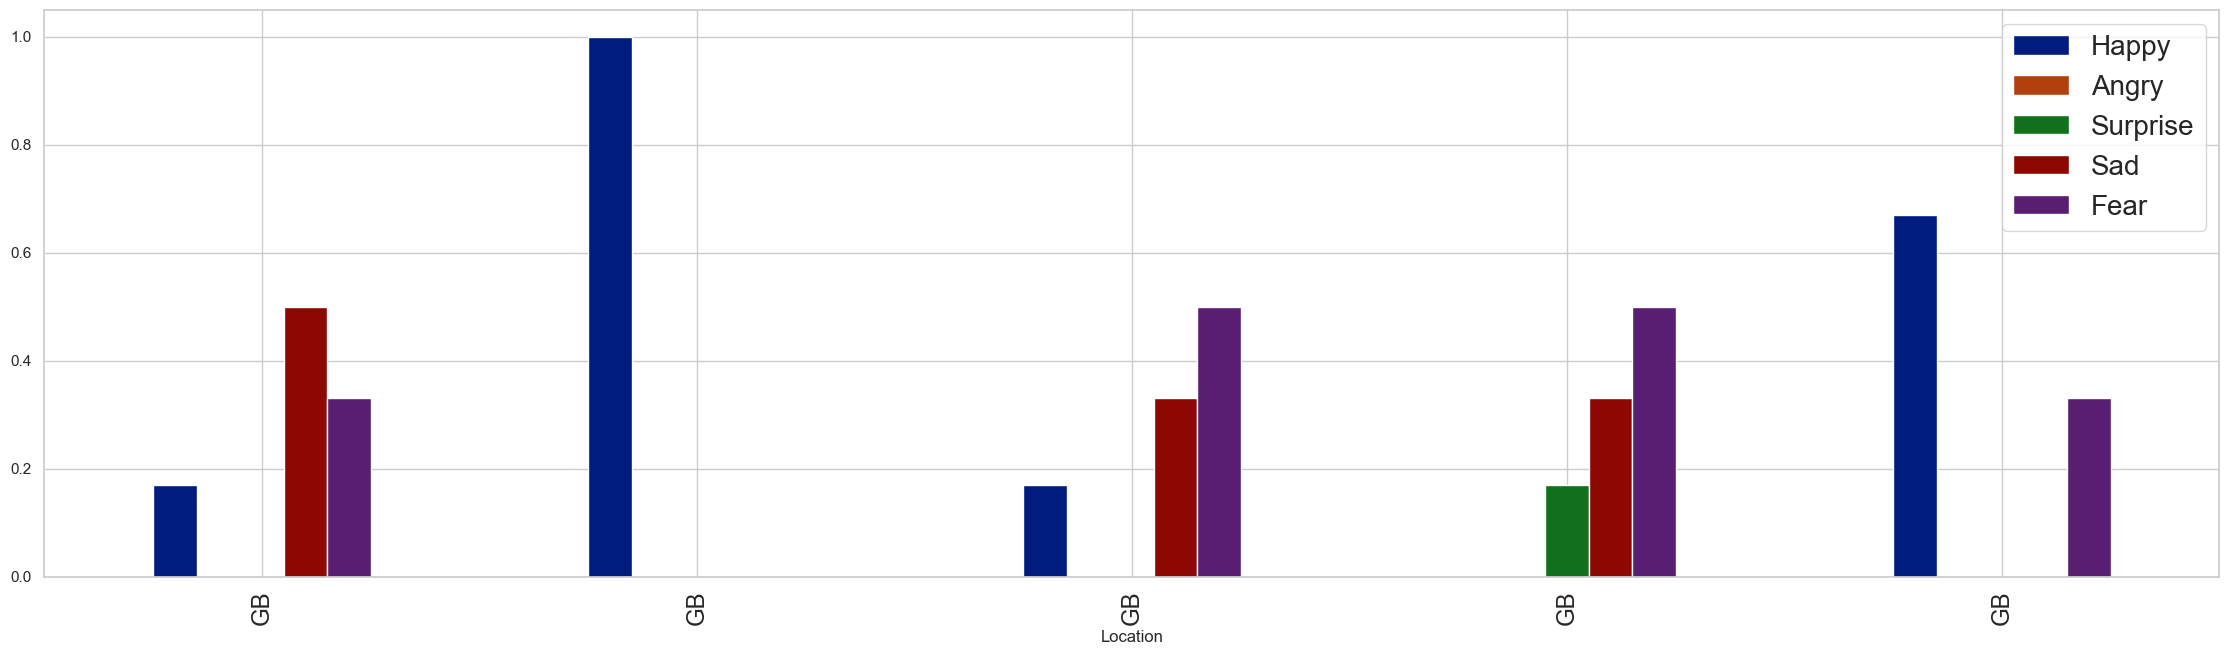

In [78]:
# visualizing the emotion dataframe
emotion_data[:5].plot(x="Location", y=["Happy", "Angry","Surprise","Sad","Fear"], kind="bar")
plt.show()

In [79]:
# deciding the emotion of each tweet by selecting emotion with maximum weight
emotion_data['Emotion'] = emotion_data[["Happy", "Angry","Surprise","Sad","Fear"]].idxmax(axis=1)
emotion_data.head(50)

,Star_rating,Username,Location,Date,Review_topic,Reviews,Date_experience,polarity,sentiment,subjectivity,Happy,Angry,Surprise,Sad,Fear,Emotion
0,5,Berls,GB,2023-09-08T12:34:48.000Z,Chat agent king!,I recently put throughbig order time holiday d...,8-Sep-23,-0.062500,negative,0.206250,0.17,0.00,0.00,0.50,0.33,Sad
1,5,Ireti Oluwagbemi,GB,2023-09-09T09:00:13.000Z,They give a damn,I returned item becausepaid next day delivery ...,9-Sep-23,0.066667,positive,0.066667,1.00,0.00,0.00,0.00,0.00,Happy
2,5,Evie,GB,2023-09-08T18:41:03.000Z,helpful and professional,When first talking robot chat helperdid n't ge...,8-Sep-23,0.176667,positive,0.246667,0.17,0.00,0.00,0.33,0.50,Fear
3,1,Sylvia Szeliga,GB,2023-09-10T10:37:57.000Z,Beware if you need to return goods…,Asos return via QR code shown onsmart phone . ...,9-Sep-23,-0.141667,negative,0.708333,0.00,0.00,0.17,0.33,0.50,Fear
4,5,Berry B,GB,2023-09-07T15:07:56.000Z,Had a faulty dress and Asos online…,Hadfaulty dress Asos online customer service a...,7-Sep-23,-0.781250,negative,1.000000,0.67,0.00,0.00,0.00,0.33,Happy
5,5,Jennifer Procter,GB,2023-09-07T12:33:19.000Z,8 years of good shopping experiences.,I shopping consistently ASOS foryears confiden...,7-Sep-23,0.211111,positive,0.507778,0.38,0.00,0.08,0.23,0.31,Happy
7,1,Emily,GB,2023-09-09T23:54:58.000Z,Cancelled my account after being a…,Cancelled account beingcustomer overdecade spe...,1-Sep-23,0.008333,positive,0.380556,0.17,0.17,0.00,0.17,0.50,Fear
8,1,customer,GB,2023-09-08T22:46:59.000Z,What has happened to ASOS??,What happened ASOS ? ? ? Refusing refund evide...,7-Sep-23,0.337500,positive,0.312500,0.25,0.00,0.00,0.50,0.25,Sad
9,3,Grace Vuzantoko,GB,2023-09-05T17:14:06.000Z,Good purchase,I purchased Fashionkilla glam high waisted sha...,23-Aug-23,0.136667,positive,0.377917,0.43,0.14,0.00,0.14,0.29,Happy
10,5,Victoria Hanna,GB,2023-09-07T23:38:25.000Z,Love shopping here and great customer…,Love shopping great customer service issue . P...,7-Sep-23,0.433333,positive,0.533333,0.75,0.00,0.00,0.00,0.25,Happy


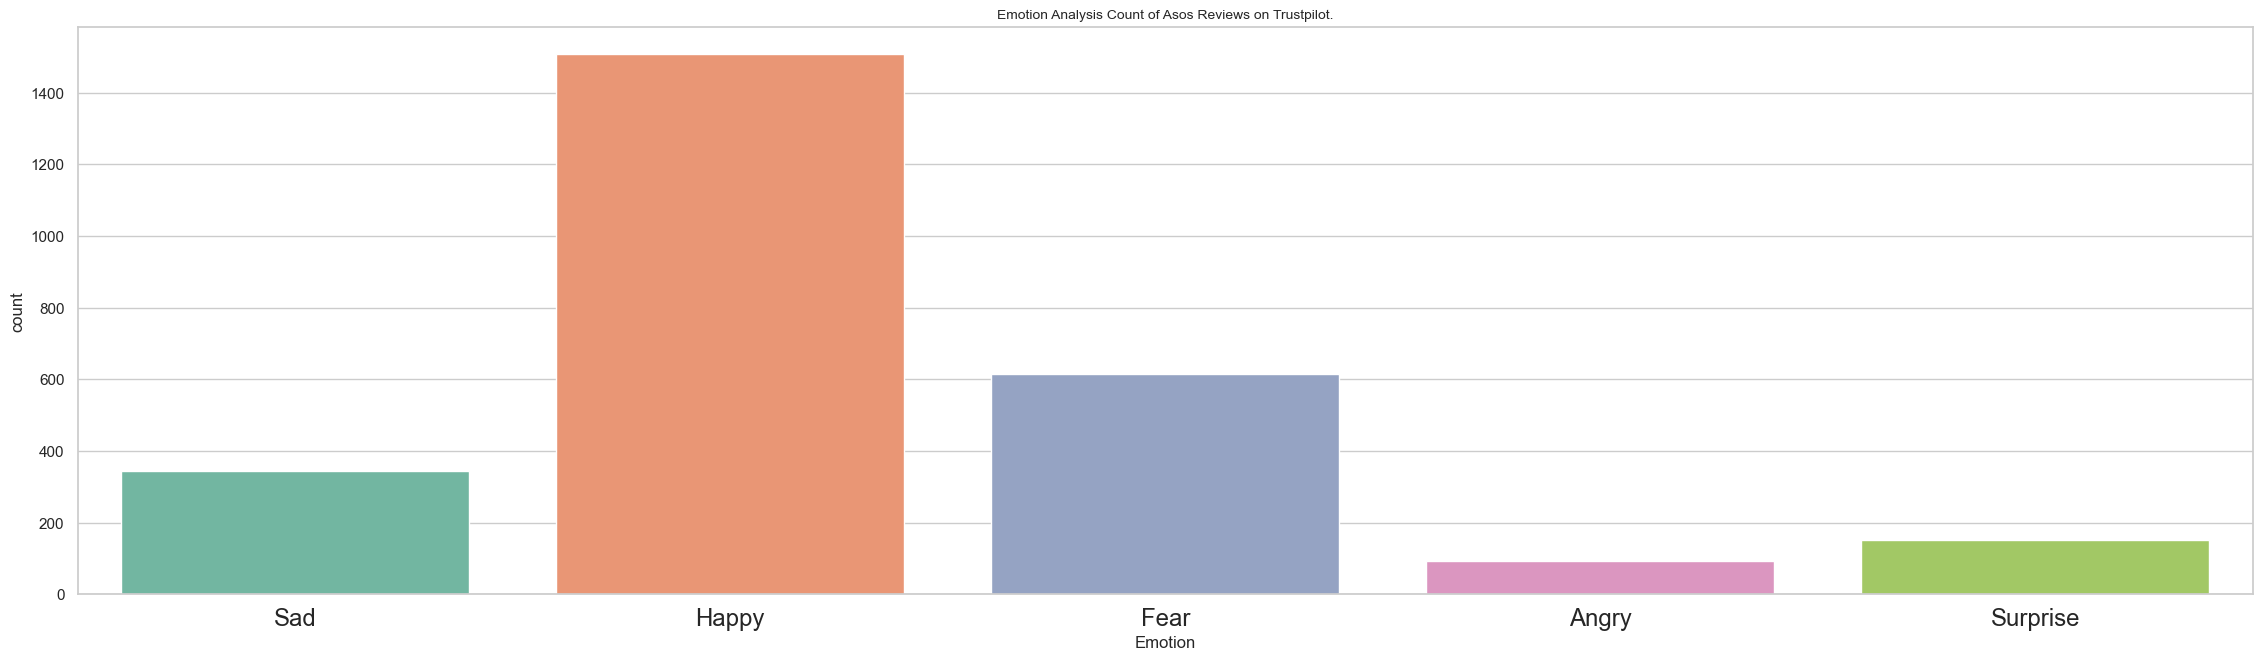

In [80]:
# visualizing the count of each emotion
bp = sns.countplot(x="Emotion", data=emotion_data, palette="Set2")
plt.title('Emotion Analysis Count of Asos Reviews on Trustpilot.', fontsize=10)
plt.show()

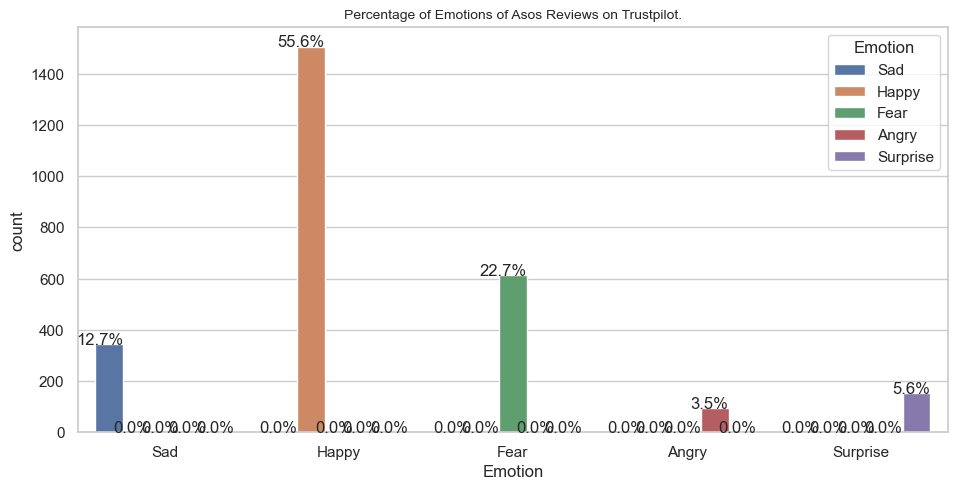

In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(emotion_data))
ax = sns.countplot(x="Emotion", hue="Emotion", data=emotion_data)
plt.title('Percentage of Emotions of Asos Reviews on Trustpilot.', fontsize=10)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

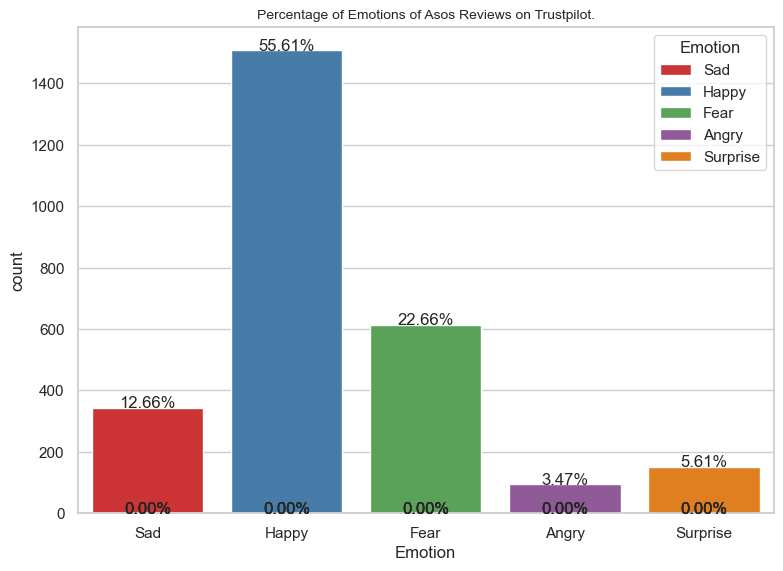

In [82]:
# Sample data
data = emotion_data 

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x="Emotion", hue="Emotion", dodge= False, palette='Set1')
plt.title('Percentage of Emotions of Asos Reviews on Trustpilot.', fontsize=10)
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')


plt.show()






In [83]:
# analyzing the corelation between our emotions and tweets
emotion_data.corr()

,Star_rating,polarity,subjectivity,Happy,Angry,Surprise,Sad,Fear
Star_rating,1.000000,0.520861,-0.030771,0.273787,0.061333,-0.191234,-0.341116,-0.315539
polarity,0.520861,1.000000,0.425708,0.431145,0.083469,-0.026300,-0.190142,-0.075690
subjectivity,-0.030771,0.425708,1.000000,0.315669,0.134825,0.124761,0.116569,0.206025
Happy,0.273787,0.431145,0.315669,1.000000,-0.063170,-0.148592,-0.249472,-0.270051
Angry,0.061333,0.083469,0.134825,-0.063170,1.000000,-0.090640,-0.097267,-0.087097
Surprise,-0.191234,-0.026300,0.124761,-0.148592,-0.090640,1.000000,-0.018598,-0.057858
Sad,-0.341116,-0.190142,0.116569,-0.249472,-0.097267,-0.018598,1.000000,-0.006439
Fear,-0.315539,-0.075690,0.206025,-0.270051,-0.087097,-0.057858,-0.006439,1.000000


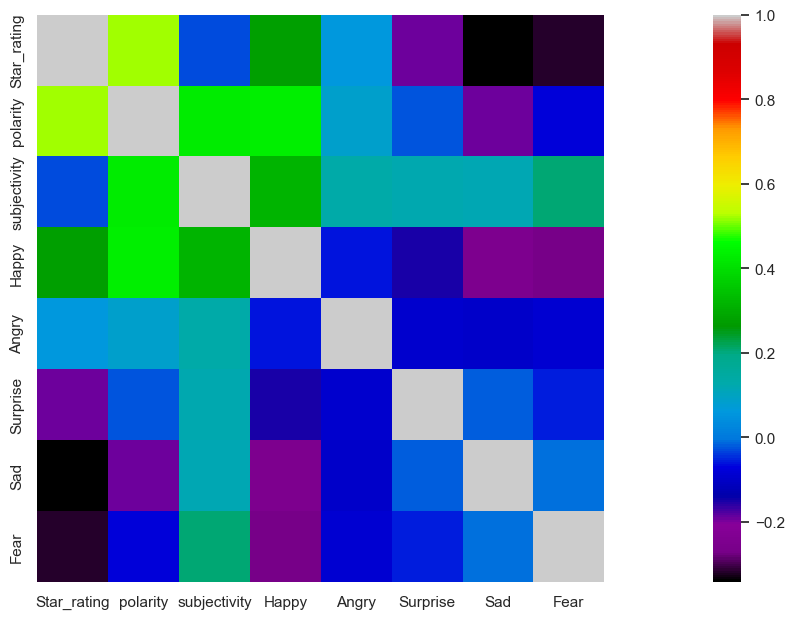

In [84]:
# visualizing the corelation matrix
sns.heatmap(emotion_data.corr(), square=True, cmap='nipy_spectral')
plt.show()